# PATHOverview image creation example

### This notebook briefly details the import, setup and usage of PATHOverview to extract images from an example slide.

PATHOverview rotates, crops and zooms images to generate customised figures.<br>
PATHOverview requires the packages:<br>
- OpenSlide and openslide-python. 
- pillow, openpyxl, matplotlib, pandas, ipywidgets, ipympl

Virtual Slides are accesses using OpenSlide (openslide.org).<br>
Both the OpenSlide main package and openslide-python bindings are required.<br>
Note: For windows users the PATH to openslide\bin must be provided after pathoverview import by setting pathoverview.OPENSLIDE_PATH. OpenSlide is imported using this path when the first slide object is loaded. This is not requred on unix systems.

This example uses freely available ndpi images from OpenSlide: https://openslide.cs.cmu.edu/download/openslide-testdata/Hamamatsu/

Slides are loaded as pathoverview.slide_obj objects with the following parameters to modify output:
- .rot = rotation of the slide in degrees.
- .mirror = True/False to flip the image.
- .zoom_point = tuple of the point on the slide to centre zoom image on. coordinates are given relative to the unrotated uncropped slide size. <br>
ie. (0.5,0.5) is the centre of the slide.
- .crop = tuple containing coordinates of centre of the crop ROI (as .zoom_point), crop width relative to unrotated slide width, crop height relative to unrotated slide height. <br>
ie. ((0.5,0.5), 0.75, 0.75) will give a ROI centred on the slide centre with width and height 0.75x that of the slide

The functions available to extract images from a slide are outlined below.

An interactive method for setting these parameters and creating multi-panel figures is provided in pathoverview_interactive_example.ipynb.

In [1]:
# set matplotlib to use inline backend for nice figure display behaviour
%matplotlib inline

# import the pathoverview module and:
# slide_obj: a python object 
# pathofigure: a class wrapper containing the function to generate figures 
#              from a dataframe containing slide details
import pathoverview
from pathoverview import slide_obj

# The python builtin Path is used to handle filepaths nicely between windows and mac
from pathlib import Path

# Pandas handles excel sheet <-> data frame data handling
import pandas as pd

In [2]:
# On windows the path to your OpenSlide binaries must be defined before first slide_obj creation
# This is not requred/used on mac
pathoverview.OPENSLIDE_PATH = r''

In [3]:
test_file = r"./test_files/OS-1.ndpi"
# slide_obj runs the filename through Path to ensure correct Win/Mac handling
my_slide = slide_obj(test_file, rotation=70)

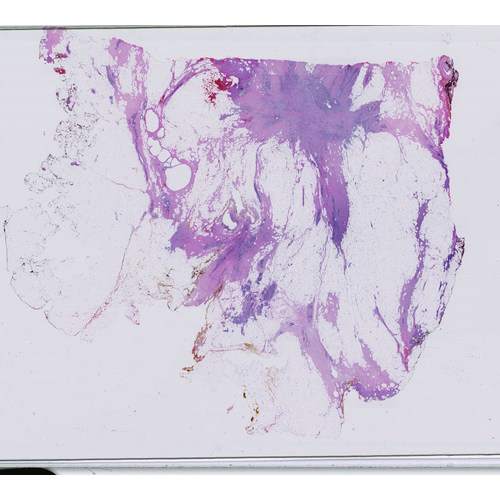

In [4]:
""" .get_raw_overview_image()
    Return a PIL.Image containing an RGBA thumbnail of the slide.
    Rotations and crop are not applied.
    size:     overall dimensions of the image. default: (500,500) px
    sb:       size of scalebar in um. default: None
"""
my_slide.get_raw_overview_image()

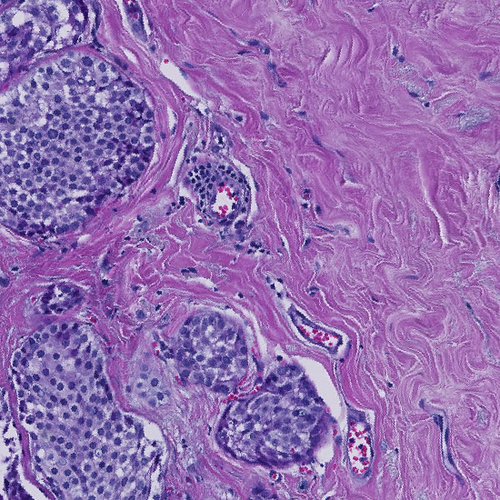

In [5]:
""" .get_zoom_image(image_size, true_width, zoom_point = None, 
                       rot = None, mirror = None, sb = None)
    returns a PIL.Image centred on zoom_point
    required:
    image_size
    true_width
    if other parameters are None, the slide_obj properties are used.
    """
my_slide.get_zoom_image((500,500),500)

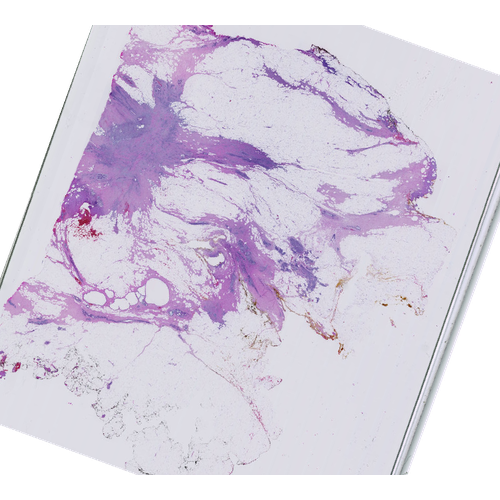

In [6]:
""" .get_crop_image(image_size, rot = None, mirror = None, 
                                    crop = None, sb = None)
    returns PIL.Image of cropped and rotated ROI from slide
    required:
    image_size
    if other parameters are None, the slide_obj properties are used.
"""
my_slide.get_crop_image((500,500))

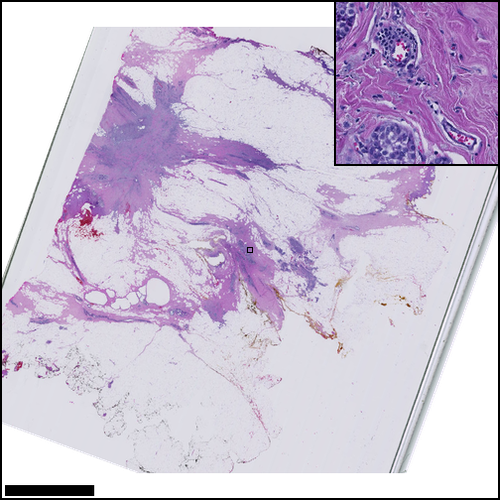

In [7]:
""" .get_figure(self, image_size = (500,500), add_inset = True, 
            inset_size = None, inset_true = 250, rot = None, 
            mirror = None, zoom_point = None, crop = None, sb = False, 
            inset_sb = False)
    returns PIL.Image containing cropped overview image with inset zoom image (add_inset = True).
    If parameters are None, slide_obj parameters are used.
"""
my_slide.get_figure(sb=5000)

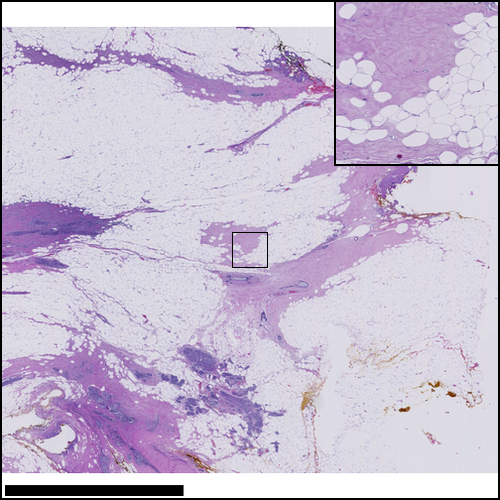

In [8]:
# An example of generating and saving a figure
fig_out = my_slide.get_figure(inset_true = 1000, sb=5000, rot = 90, zoom_point = (0.65,0.65), crop = ((0.65,0.65),0.5,0.5))
fig_out.save(Path(r".\test_files\test_image.png"))
display(fig_out)